## Scenario & Algorithm

- Historical Record --predict--> Ability & Willingness to pay back their debt.
- Binary Classification: Logistic regression

## Data Pre-processing

In [1]:
# Numpy,Pandas
import numpy as np
import pandas as pd

# matplotlib,seaborn,pyecharts
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno

#  ignore warnings
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.float_format', lambda x: '%.5f' % x) #为了直观的显示数字，不采用科学计数法?????

In [2]:
data = pd.read_csv('LoanStats_2017Q2.csv' , encoding='latin-1',skiprows = 1)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,7200.00000,7200.00000,7200.00000,36 months,24.85%,285.70000,E,E3,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,10000.00000,10000.00000,10000.00000,36 months,7.21%,309.74000,A,A3,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,13000.00000,13000.00000,13000.00000,36 months,11.99%,431.73000,B,B5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,6000.00000,6000.00000,6000.00000,36 months,9.44%,192.03000,B,B1,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,12000.00000,12000.00000,12000.00000,60 months,30.65%,393.05000,F,F4,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan


In [3]:
data.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [4]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.00000,105451.00000,105451.00000,105451.00000,105451.00000,105451.00000,0.00000,0.00000,105376.00000,105451.00000,...,351.00000,351.00000,351.00000,351.00000,314.00000,351.00000,351.00000,157.00000,157.00000,157.00000
mean,nan,14589.07052,14589.07052,14585.19573,436.78282,80451.96633,nan,nan,18.98728,0.35605,...,3.00000,215.52991,3.00000,5.09972,627.79395,16472.80026,221.46393,7367.62624,54.39096,16.77707
std,nan,9478.83420,9478.83420,9476.11951,280.16982,68220.63633,nan,nan,14.14549,0.96205,...,0.00000,150.89643,0.00000,8.45822,436.31840,9212.50300,237.17256,5112.26674,9.65659,5.99102
min,nan,1000.00000,1000.00000,1000.00000,30.12000,0.00000,nan,nan,0.00000,0.00000,...,3.00000,15.82000,3.00000,0.00000,47.46000,1385.20000,0.01000,525.00000,30.10000,1.00000
25%,nan,7000.00000,7000.00000,7000.00000,232.64000,48000.00000,nan,nan,12.23000,0.00000,...,3.00000,93.07500,3.00000,0.00000,264.38250,8834.90500,1.28000,3315.00000,45.00000,12.00000
50%,nan,12000.00000,12000.00000,12000.00000,361.38000,68000.00000,nan,nan,18.12000,0.00000,...,3.00000,180.82000,3.00000,0.00000,520.09500,14525.41000,144.06000,6255.00000,50.00000,18.00000
75%,nan,20000.00000,20000.00000,20000.00000,584.37000,97000.00000,nan,nan,24.58000,0.00000,...,3.00000,300.50500,3.00000,10.00000,876.93750,23279.15500,375.79500,10460.00000,65.00000,20.00000
max,nan,40000.00000,40000.00000,40000.00000,1719.83000,8900000.00000,nan,nan,999.00000,42.00000,...,3.00000,803.55000,3.00000,29.00000,2262.09000,39542.45000,1042.20000,22366.00000,78.32000,24.00000


### Delete columns (too many missing values, single value) and rows(too many missing values)

In [5]:
# isnull() check data with NaN in numeric arrays, None or nan in object arrays, NaT in datetimelike
check_null = data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))
check_null[check_null > 0.4]

member_id                                    1.00000
url                                          1.00000
desc                                         1.00000
id                                           0.99998
settlement_percentage                        0.99851
settlement_term                              0.99851
debt_settlement_flag_date                    0.99851
settlement_date                              0.99851
settlement_status                            0.99851
settlement_amount                            0.99851
orig_projected_additional_accrued_interest   0.99702
hardship_start_date                          0.99667
hardship_reason                              0.99667
hardship_status                              0.99667
deferral_term                                0.99667
hardship_amount                              0.99667
hardship_type                                0.99667
hardship_end_date                            0.99667
hardship_length                              0

In [6]:
# Drop columns that has more than 40% of missing values
data = data.dropna(thresh=len(data)*0.4, axis=1)

In [7]:
data['mths_since_last_delinq'][:30]

0    72.00000
1    44.00000
2    16.00000
3         nan
4    13.00000
5         nan
6         nan
7    35.00000
8         nan
9    35.00000
10        nan
11   37.00000
12        nan
13        nan
14        nan
15        nan
16   50.00000
17   72.00000
18        nan
19   51.00000
20        nan
21        nan
22        nan
23        nan
24        nan
25        nan
26   24.00000
27        nan
28        nan
29   16.00000
Name: mths_since_last_delinq, dtype: float64

In [8]:
data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data))

mths_since_last_delinq       0.48478
next_pymnt_d                 0.16706
il_util                      0.12690
mths_since_recent_inq        0.11333
emp_title                    0.06433
num_tl_120dpd_2m             0.05007
mths_since_rcnt_il           0.02517
mo_sin_old_il_acct           0.02517
bc_util                      0.01131
percent_bc_gt_75             0.01089
bc_open_to_buy               0.01086
mths_since_recent_bc         0.01029
last_pymnt_d                 0.00118
revol_util                   0.00073
dti                          0.00073
all_util                     0.00014
avg_cur_bal                  0.00004
out_prncp                    0.00002
total_acc                    0.00002
initial_list_status          0.00002
debt_settlement_flag         0.00002
out_prncp_inv                0.00002
total_pymnt                  0.00002
revol_bal                    0.00002
total_rec_prncp              0.00002
total_rec_int                0.00002
total_rec_late_fee           0.00002
r

In [9]:
data.shape

(105453, 103)

In [10]:
# find columns with the same value for all records
data.loc[:, data.apply(pd.Series.nunique) == 1]

,policy_code
0,1.00000
1,1.00000
2,1.00000
3,1.00000
4,1.00000
5,1.00000
6,1.00000
7,1.00000
8,1.00000
9,1.00000


In [11]:
# drop that column cuz it's not going to provide any useful information
data = data.loc[:, data.apply(pd.Series.nunique) != 1]

In [12]:
data.shape

(105453, 102)

In [13]:
data.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
105448,10050.00000,10050.00000,10050.00000,36 months,16.99%,358.26000,D,D1,Sales Associate,8 years,...,0.00000,0.00000,0.00000,30400.00000,14300.00000,9000.00000,0.00000,N,Cash,N
105449,6000.00000,6000.00000,6000.00000,36 months,11.44%,197.69000,B,B4,Contact input,5 years,...,0.00000,0.00000,0.00000,47476.00000,26201.00000,8100.00000,34076.00000,N,Cash,N
105450,30000.00000,30000.00000,30000.00000,60 months,25.49%,889.18000,E,E4,Assistant Manager,4 years,...,66.70000,0.00000,0.00000,275706.00000,75819.00000,16000.00000,89732.00000,N,Cash,N
105451,nan,nan,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN
105452,nan,nan,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,...,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN


In [14]:
# drop nan rows at the tail 
data.drop([105451, 105452], inplace=True)

In [15]:
data.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
105446,24000.00000,24000.00000,24000.00000,60 months,23.99%,690.30000,E,E2,Senior Escrow Officer,< 1 year,...,0.00000,1.00000,1.00000,103322.00000,60812.00000,28200.00000,64422.00000,N,Cash,N
105447,10000.00000,10000.00000,10000.00000,36 months,7.99%,313.32000,A,A5,Rn,10+ years,...,14.30000,0.00000,0.00000,132303.00000,55863.00000,34800.00000,70203.00000,N,Cash,N
105448,10050.00000,10050.00000,10050.00000,36 months,16.99%,358.26000,D,D1,Sales Associate,8 years,...,0.00000,0.00000,0.00000,30400.00000,14300.00000,9000.00000,0.00000,N,Cash,N
105449,6000.00000,6000.00000,6000.00000,36 months,11.44%,197.69000,B,B4,Contact input,5 years,...,0.00000,0.00000,0.00000,47476.00000,26201.00000,8100.00000,34076.00000,N,Cash,N
105450,30000.00000,30000.00000,30000.00000,60 months,25.49%,889.18000,E,E4,Assistant Manager,4 years,...,66.70000,0.00000,0.00000,275706.00000,75819.00000,16000.00000,89732.00000,N,Cash,N


In [16]:
# save data
data.to_csv('loans_2017q2_ml.csv', index=False)

### Missing Values

#### Categorical Values (object)

In [17]:
# read again
loans = pd.read_csv('loans_2017q2_ml.csv') 

In [18]:
objectColumns = loans.select_dtypes(include=['object']).columns
loans[objectColumns].isnull().sum().sort_values(ascending=False)

next_pymnt_d            17615
emp_title                6782
last_pymnt_d              122
revol_util                 75
debt_settlement_flag        0
pymnt_plan                  0
int_rate                    0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
verification_status         0
issue_d                     0
loan_status                 0
title                       0
purpose                     0
disbursement_method         0
zip_code                    0
addr_state                  0
earliest_cr_line            0
initial_list_status         0
last_credit_pull_d          0
application_type            0
hardship_flag               0
term                        0
dtype: int64

In [19]:
# convert int_rate, revol_util into type float
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')
objectColumns = loans.select_dtypes(include=["object"]).columns
loans[objectColumns].isnull().sum().sort_values(ascending=False)

next_pymnt_d            17615
emp_title                6782
last_pymnt_d              122
debt_settlement_flag        0
pymnt_plan                  0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
verification_status         0
issue_d                     0
loan_status                 0
title                       0
purpose                     0
disbursement_method         0
zip_code                    0
addr_state                  0
earliest_cr_line            0
initial_list_status         0
last_credit_pull_d          0
application_type            0
hardship_flag               0
term                        0
dtype: int64

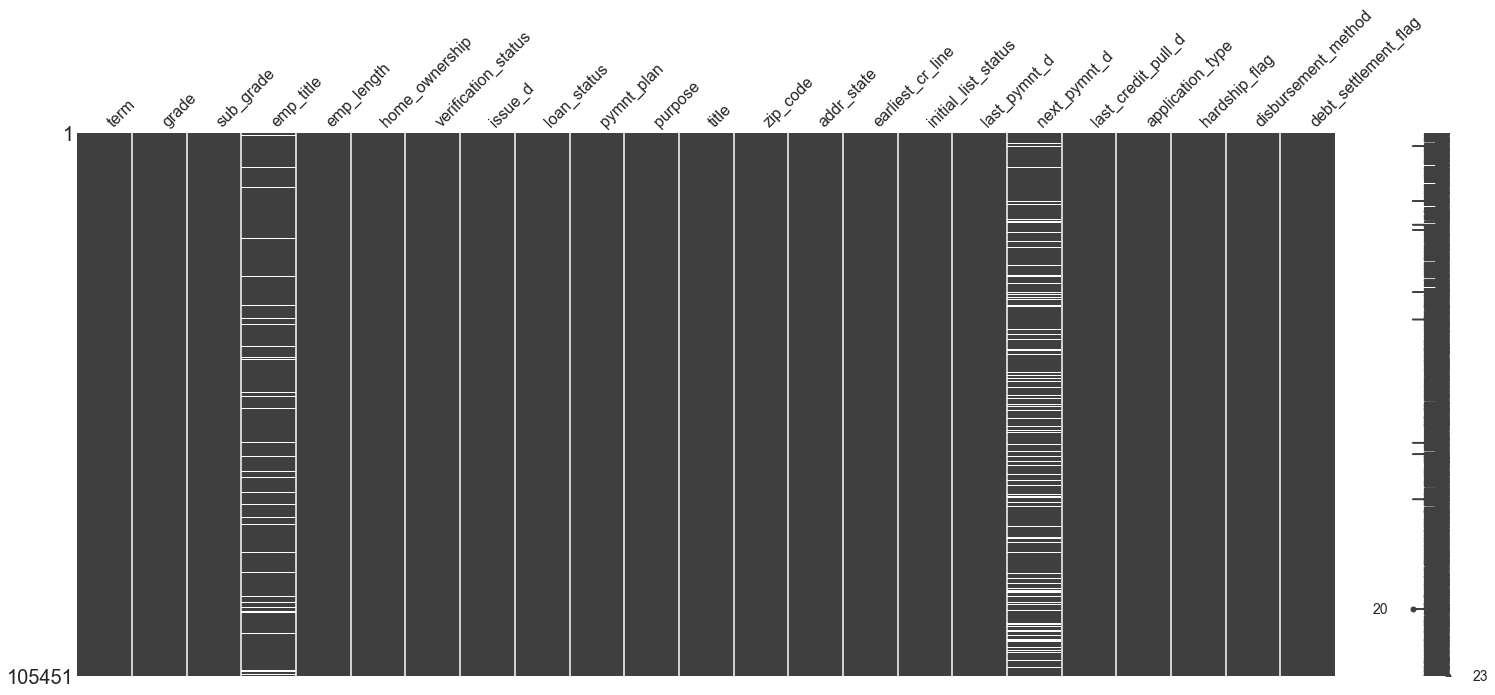

In [20]:
# visualization of missing values
msno.matrix(loans[objectColumns]) 

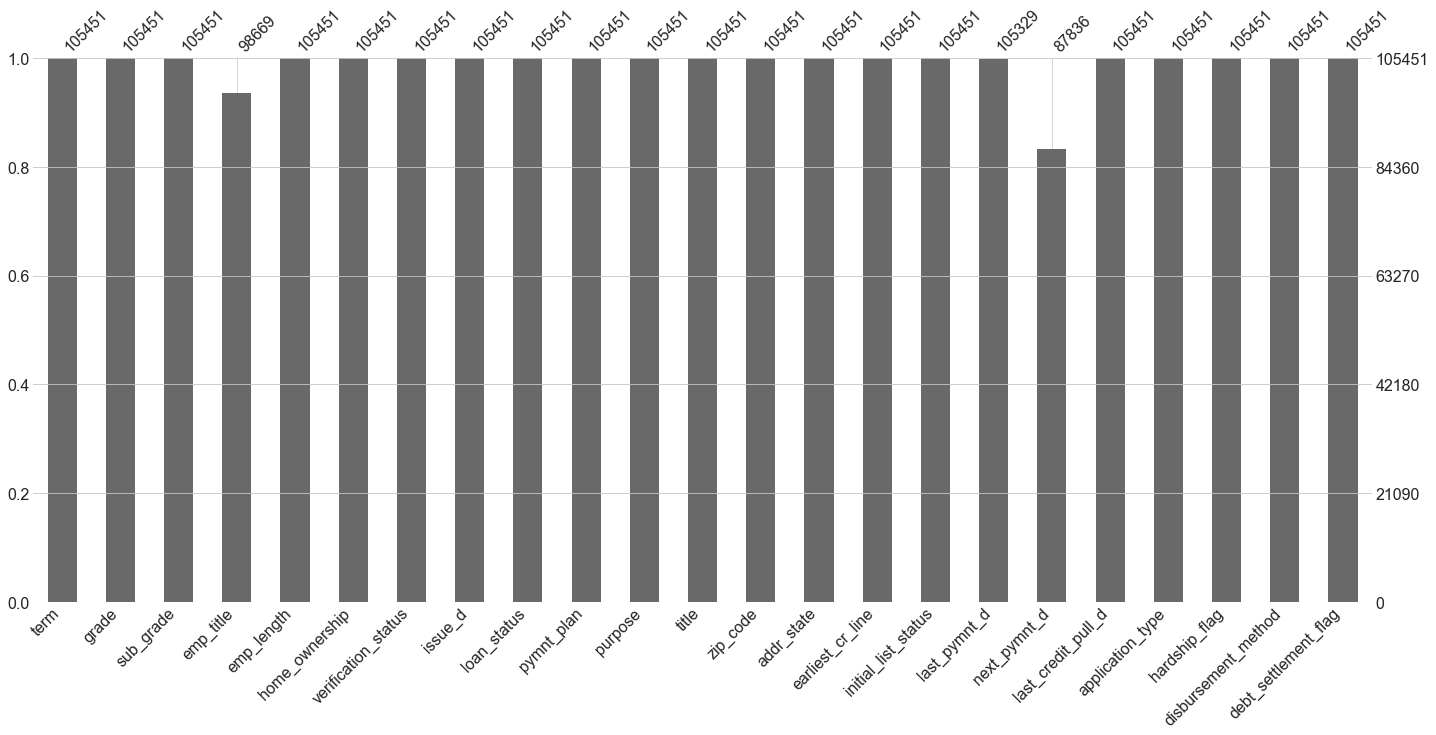

In [21]:
# another visualization
msno.bar(loans[objectColumns])

In [22]:
# fill NaN with 'Unknown'
loans[objectColumns] = loans[objectColumns].fillna('Unknown')
loans[objectColumns].isnull().sum().sort_values(ascending=False)

debt_settlement_flag    0
purpose                 0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
verification_status     0
issue_d                 0
loan_status             0
pymnt_plan              0
title                   0
disbursement_method     0
zip_code                0
addr_state              0
earliest_cr_line        0
initial_list_status     0
last_pymnt_d            0
next_pymnt_d            0
last_credit_pull_d      0
application_type        0
hardship_flag           0
term                    0
dtype: int64

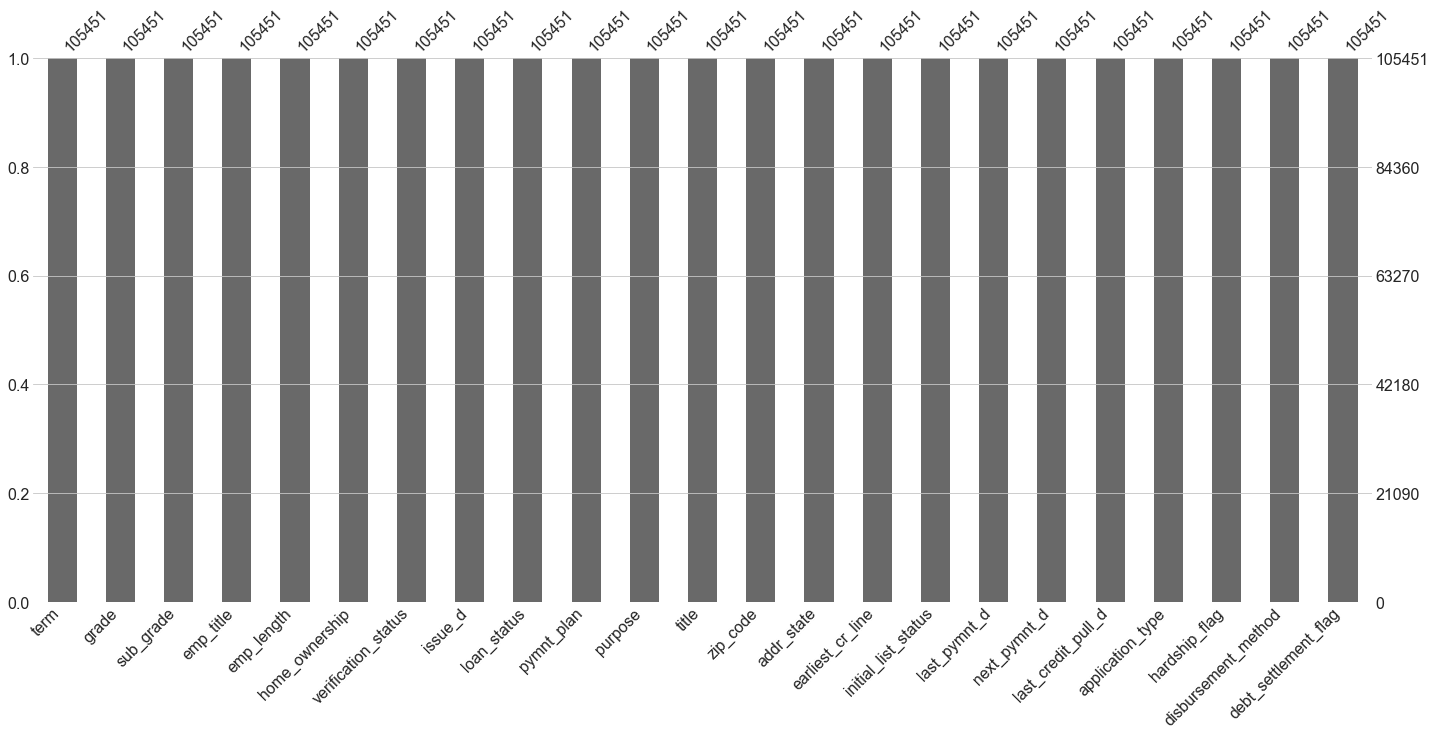

In [23]:
msno.bar(loans[objectColumns]) # no missing values left

#### Numerical Values (int, float)

In [24]:
loans.select_dtypes(include=[np.number]).isnull().sum().sort_values(ascending=False)

mths_since_last_delinq        51119
il_util                       13380
mths_since_recent_inq         11949
num_tl_120dpd_2m               5278
mths_since_rcnt_il             2652
mo_sin_old_il_acct             2652
bc_util                        1191
percent_bc_gt_75               1146
bc_open_to_buy                 1143
mths_since_recent_bc           1083
revol_util                       75
dti                              75
all_util                         13
avg_cur_bal                       2
open_acc                          0
collection_recovery_fee           0
installment                       0
open_il_24m                       0
open_il_12m                       0
open_act_il                       0
open_acc_6m                       0
tot_cur_bal                       0
tot_coll_amt                      0
acc_now_delinq                    0
collections_12_mths_ex_med        0
annual_inc                        0
delinq_2yrs                       0
last_pymnt_amnt             

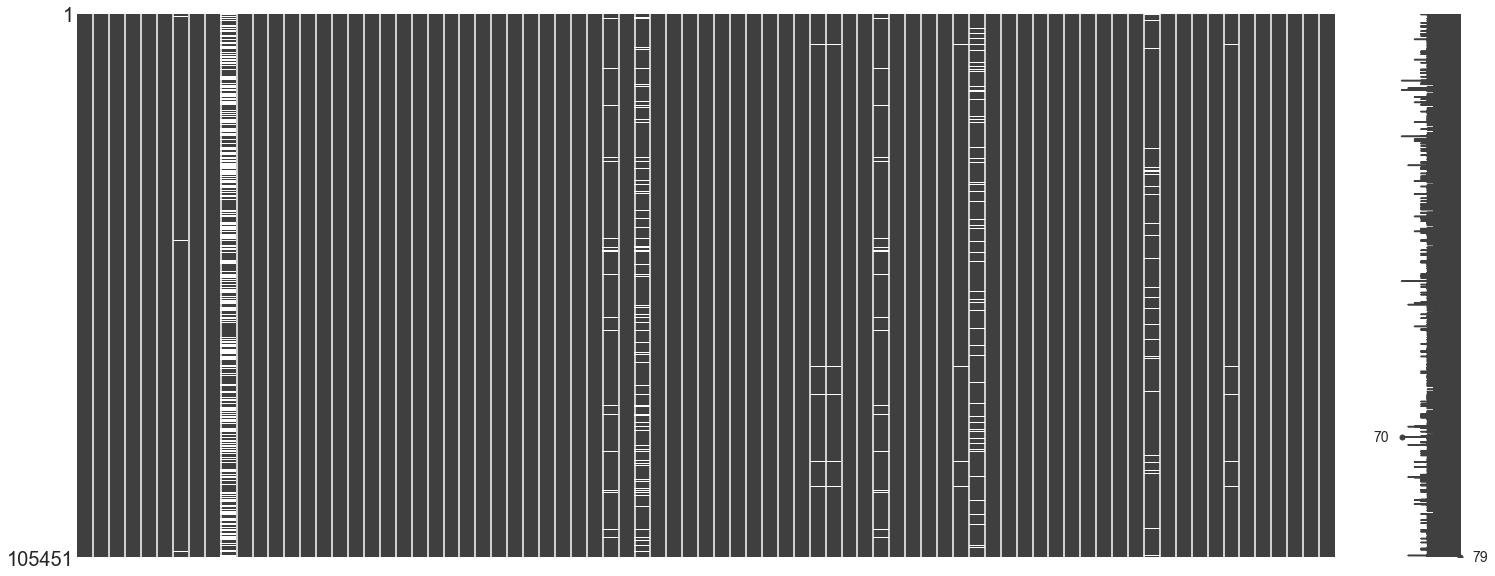

In [25]:
numColumns = loans.select_dtypes(include=[np.number]).columns
msno.matrix(loans[numColumns])

In [26]:
loans[numColumns].head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,7200.00000,7200.00000,7200.00000,24.85000,285.70000,50000.00000,6.07000,0.00000,0.00000,72.00000,...,0.00000,0.00000,80.00000,100.00000,0.00000,0.00000,7600.00000,5588.00000,3600.00000,4000.00000
1,10000.00000,10000.00000,10000.00000,7.21000,309.74000,145000.00000,6.58000,0.00000,2.00000,44.00000,...,0.00000,7.00000,98.30000,40.00000,0.00000,0.00000,330503.00000,24170.00000,46100.00000,16613.00000
2,13000.00000,13000.00000,13000.00000,11.99000,431.73000,85000.00000,6.79000,1.00000,0.00000,16.00000,...,1.00000,0.00000,41.70000,100.00000,0.00000,0.00000,19602.00000,15332.00000,7800.00000,11802.00000
3,6000.00000,6000.00000,6000.00000,9.44000,192.03000,36000.00000,6.97000,0.00000,1.00000,nan,...,0.00000,0.00000,100.00000,100.00000,0.00000,0.00000,7100.00000,5054.00000,4500.00000,0.00000
4,12000.00000,12000.00000,12000.00000,30.65000,393.05000,121111.00000,19.90000,2.00000,0.00000,13.00000,...,2.00000,0.00000,82.10000,100.00000,0.00000,0.00000,103260.00000,81349.00000,13700.00000,69860.00000


In [27]:
# Mean interpolation: replace missing values using the mean along the axis.
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(loans[numColumns])   # fit data used to calculate the interpolating values
loans[numColumns] = imr.transform(loans[numColumns])  # fill in missing values with interpolating values

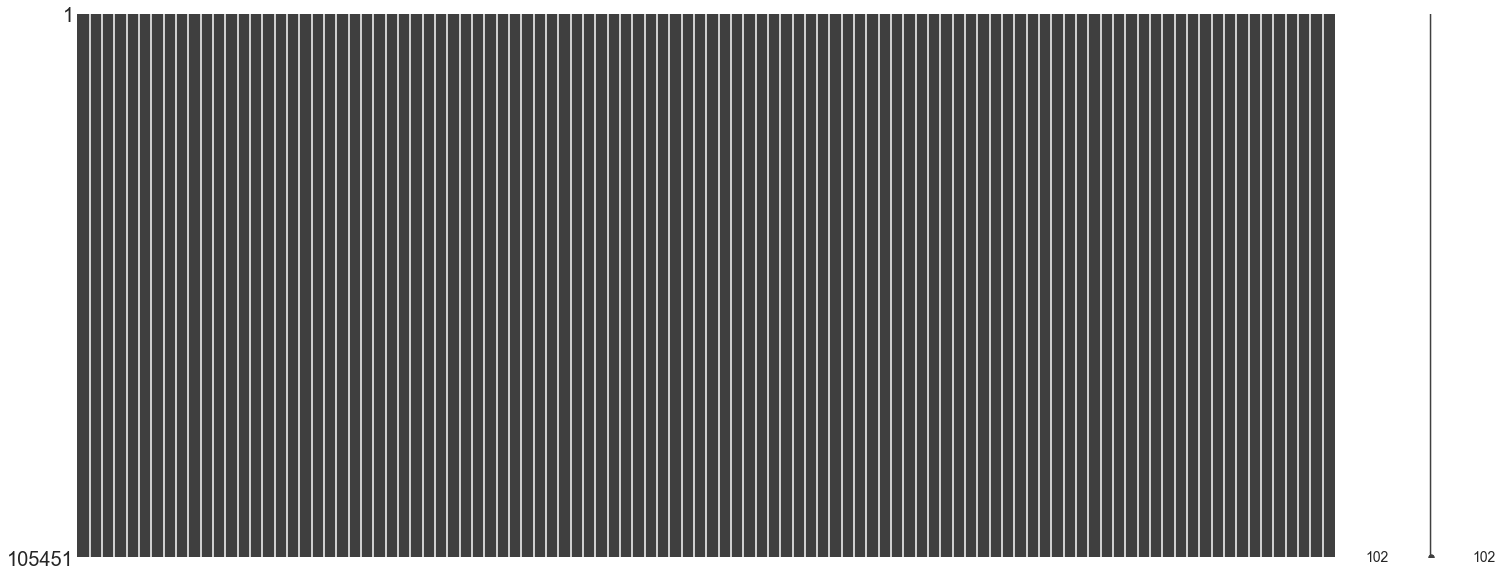

In [28]:
msno.matrix(loans) # no missing values left

## Feature Engineering

### Manually Drop redundent, irrelevant features 
for categorical variables

In [29]:
objectColumns = loans.select_dtypes(include=['object']).columns
objectColumns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [30]:
for c in objectColumns:
    print('\n' + c)
    print(loans[c].value_counts())


term
 36 months    77105
 60 months    28346
Name: term, dtype: int64

grade
C    36880
B    31301
A    17898
D    12015
E     4847
F     1725
G      785
Name: grade, dtype: int64

sub_grade
C1    8088
C5    7985
B5    7511
C4    7208
C3    6973
C2    6626
B1    6416
B3    6012
B4    5821
B2    5541
A5    4690
A1    4365
D1    3146
D3    3132
A2    3112
A4    2936
D2    2911
A3    2795
D4    1591
E5    1246
D5    1235
E2    1141
E1     983
E4     788
E3     689
F1     522
F2     392
F3     344
F4     250
F5     217
G1     203
G2     178
G5     147
G3     134
G4     123
Name: sub_grade, dtype: int64

emp_title
Unknown                                  6782
Teacher                                  1999
Manager                                  1847
Owner                                    1218
Driver                                    861
Registered Nurse                          815
RN                                        800
Supervisor                                726
Sales         

Drop redundant, irrelevant information:
### redundant, irrelevant

'sub_grade', 'emp_title', 'title', 'zip_code', 'addr_state',
'hardship_flag', 'disbursement_method', 'debt_settlement_flag', 'earliest_cr_line', 'next_pymnt_d', 'collection_recovery_fee', 'pymnt_plan', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag'


### leaking
Some variables are information we gain after the loan is launched. We cannot include these as predictors since we won't have these data when we make prediction for a new loan application

'initial_list_status', 'mths_since_last_delinq', 'issue_d','last_pymnt_d', 'last_pymnt_amnt',  'last_credit_pull_d', 


In [31]:
droplist = ['sub_grade', 'emp_title',  'title', 'zip_code', 'addr_state', 
             'mths_since_last_delinq' ,'initial_list_status', 'issue_d','last_pymnt_d','last_pymnt_amnt',
             'next_pymnt_d','last_credit_pull_d','collection_recovery_fee', 'earliest_cr_line', 'pymnt_plan', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
loans.drop(droplist, axis=1, inplace=True)

In [32]:
len(droplist)

18

In [33]:
loans.select_dtypes(include=['object']).head()
#  what's left: ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status','loan_status', 'purpose', 'application_type']

,term,grade,emp_length,home_ownership,verification_status,loan_status,purpose,application_type
0,36 months,E,2 years,RENT,Source Verified,Fully Paid,debt_consolidation,Individual
1,36 months,A,7 years,OWN,Not Verified,Current,credit_card,Individual
2,36 months,B,10+ years,MORTGAGE,Source Verified,Current,debt_consolidation,Individual
3,36 months,B,1 year,RENT,Not Verified,Current,credit_card,Individual
4,60 months,F,10+ years,RENT,Source Verified,Current,house,Individual


In [34]:
loans.select_dtypes(include=['object']).shape

(105451, 8)

### Deriving [Installment Feat]
The ratio of monthly installment vs. monthly income
- installment: The monthly payment owed by the borrower if the loan originates.
- annual_inc: The self-reported annual income provided by the borrower during registration.

In [35]:
loans['installment_feat'] = loans['installment'] / (loans['annual_inc'] / 12)

In [36]:
loans['installment_feat'].describe()
# due to annual_inc = 0, installment_feat could be inf

count   105451.00000
mean             inf
std              nan
min          0.00024
25%          0.04136
50%          0.06540
75%          0.09854
max              inf
Name: installment_feat, dtype: float64

In [37]:
# replace inf with max*2, max is 3051
import math
loans.installment_feat[loans.installment_feat.apply(math.isinf)] = 6000

In [38]:
loans['installment_feat'].describe()

count   105451.00000
mean         4.31858
std        159.16325
min          0.00024
25%          0.04136
50%          0.06540
75%          0.09854
max       6000.00000
Name: installment_feat, dtype: float64

### Feature Abstraction 
#### Binarization [Loans Status]

In [39]:
loans.loan_status.value_counts()

Current               84496
Fully Paid            14702
Charged Off            2913
Late (31-120 days)     1973
In Grace Period         812
Late (16-30 days)       520
Default                  35
Name: loan_status, dtype: int64

In [40]:
# encoding loan_status: non-default = 0, default = 1   obj -> int
codeDict = {'Current': 0, 'Fully Paid': 0, 'In Grace Period':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'Charged Off':1, 'Default': 1}
for key, value in codeDict.items():  # items() list of return tuple
    loans.loan_status.replace(key, value, inplace=True)

In [41]:
loans.loan_status.value_counts()

0    99198
1     6253
Name: loan_status, dtype: int64

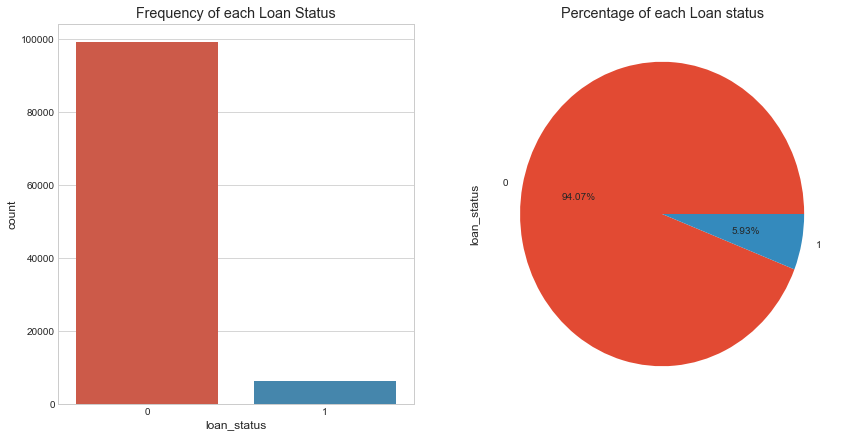

In [42]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans['loan_status'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

#### Ordinal Values [Emp Length & Grade]

pd.DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')
- to_replace: For a DataFrame nested dictionaries, e.g., {'a': {'b': np.nan}}, are read as follows: look in column ‘a’ for the value ‘b’ and replace it with NaN. The value parameter should be None to use a nested dict in this way. You can nest regular expressions as well. Note that column names (the top-level dictionary keys in a nested dictionary) cannot be regular expressions.

In [43]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loans.replace(mapping_dict, inplace=True)

In [44]:
loans[['emp_length', 'grade']].head()

,emp_length,grade
0,2,5
1,7,1
2,10,2
3,1,2
4,10,6


#### Nominal Values - One-hot Encoding [Home Ownership, Veri Status, App Type, Purpose & Term] 

In [45]:
nominalColumns = ['home_ownership', 'verification_status', 'application_type', 'purpose', 'term'] 
dummy_df = pd.get_dummies(loans[nominalColumns])
loans = pd.concat([loans, dummy_df], axis=1)

In [46]:
loans.loc[:, loans.columns.str.contains('home_ownership')].head()

,home_ownership,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT
0,RENT,0,0,0,0,1
1,OWN,0,0,0,1,0
2,MORTGAGE,0,1,0,0,0
3,RENT,0,0,0,0,1
4,RENT,0,0,0,0,1


In [47]:
loans.drop(nominalColumns, axis=1, inplace=True)

In [48]:
loans.info()
# unit8 -- columns for one-hot encodings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105451 entries, 0 to 105450
Columns: 105 entries, loan_amnt to term_ 60 months
dtypes: float64(77), int64(3), uint8(25)
memory usage: 66.9 MB


### Feature Scaling 
#### Standardization [All numerical variables except for Loan Status]

- Normalization: x_new=(x-x_min)/(x_max-x_min )

For normalization, the maximum number we can get after applying the formula is 1, and the minimum number is 0. So here is one big characteristic all the numbers will be between 0 and 1.

- Standardization: x_new=(x-μ)/σ

In the case of the standardization is quite different, we don’t count with boundaries, we know that in theory in many cases, the majority of the new numbers will be located between -3 and 3, but we can get less or more than that.

In [49]:
col = loans.select_dtypes(include=['int64','float64']).columns
col = col.drop('loan_status') # drop the outcome variable


In [52]:
from sklearn.preprocessing import StandardScaler 
sc =StandardScaler() 

loans_ml_df = loans # copy loans to loans_ml_df
loans_ml_df[col] =sc.fit_transform(loans_ml_df[col]) # standardization

In [53]:
loans_ml_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,-0.77954,-0.77954,-0.77935,2.24237,-0.53926,1.97599,-0.89165,-0.44638,0,-0.91350,...,0,0,0,0,0,0,0,0,1,0
1,-0.48414,-0.48414,-0.48387,-1.17800,-0.45345,-1.38515,0.38433,0.94617,0,-0.87744,...,0,0,0,0,0,0,0,0,1,0
2,-0.16764,-0.16764,-0.16728,-0.25117,-0.01803,-0.54487,1.14992,0.06667,0,-0.86258,...,0,0,0,0,0,0,0,0,1,0
3,-0.90614,-0.90614,-0.90599,-0.74561,-0.87359,-0.54487,-1.14685,-0.65159,0,-0.84985,...,0,0,0,0,0,0,0,0,1,0
4,-0.27314,-0.27314,-0.27281,3.36698,-0.15609,2.81627,1.14992,0.59600,0,0.06455,...,0,0,0,0,0,0,0,0,0,1


### Feature Selection

In [54]:
# building x_feature & y_feature(target)
x_feature = list(loans_ml_df.columns)
x_feature.remove('loan_status')

x_val = loans_ml_df[x_feature]
y_val = loans_ml_df['loan_status']
len(x_feature)

104

In [55]:
x_val.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,105451.00000,0.00000,1.00000,-1.43363,-0.80064,-0.27314,0.57085,2.68082
funded_amnt,105451.00000,0.00000,1.00000,-1.43363,-0.80064,-0.27314,0.57085,2.68082
funded_amnt_inv,105451.00000,-0.00000,1.00000,-1.43363,-0.80046,-0.27281,0.57142,2.68200
int_rate,105451.00000,-0.00000,1.00000,-1.54447,-0.65060,-0.12901,0.52443,3.43291
installment,105451.00000,-0.00000,1.00000,-1.45149,-0.72864,-0.26913,0.52678,4.57956
grade,105451.00000,-0.00000,1.00000,-1.38515,-0.54487,0.29542,0.29542,3.65656
emp_length,105451.00000,0.00000,1.00000,-1.40204,-0.89165,-0.12606,1.14992,1.14992
annual_inc,105451.00000,0.00000,1.00000,-1.17930,-0.47569,-0.18253,0.24257,129.28038
dti,105451.00000,-0.00000,1.00000,-1.34277,-0.47716,-0.06063,0.39481,69.30591
delinq_2yrs,105451.00000,0.00000,1.00000,-0.37010,-0.37010,-0.37010,-0.37010,43.28700


#### Wrapper Approach: Recursive Feature Elimination

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 30) # keep only 30 features
rfe = rfe.fit(x_val, y_val)
print(rfe.support_)
print(rfe.ranking_) # 1s are features selected

[ True  True  True False  True  True False False False False False  True
 False False False False  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False  True  True False  True  True
  True  True  True  True  True False False False False  True  True False
 False  True False  True False False  True  True]
[ 1  1  1  8  1  1 36  9 46 31 57  1 28 33 23 39  1  1  1  1  1  1  1  1 64
 69 75 68 54 52 18 10 65 19 43 16 11 30 60 21 48 47 58 25 53 34 44 61 51 66
 37 26 59 63 72 15 67 49 14 55  7 56 13 38 32  1 73 50 35 17 62 45 29 27 74
 22  6 20 71  1  1 70  1  1  1  1  1  1  1 41  2  4  3  1  1 40 42  1 12  1
  5 24  1  1]


In [57]:
col_filter_1 = x_val.columns[rfe.support_]

In [58]:
col_filter_1

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'grade',
       'open_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'num_sats', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_Individual', 'application_type_Joint App',
       'purpose_house', 'purpose_major_purchase', 'purpose_other',
       'purpose_small_business', 'term_ 36 months', 'term_ 60 months'],
      dtype='object')

#### Filter Approach: Correlation Matrix

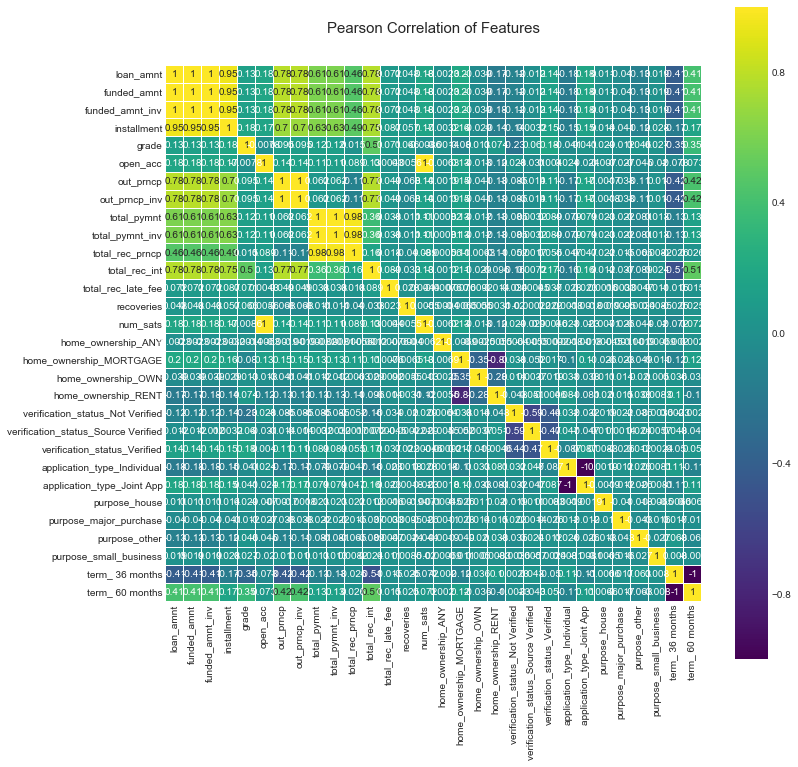

In [59]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(loans_ml_df[col_filter_1].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [60]:
corrMatrix = loans_ml_df[col_filter_1].corr()
upTri = np.triu(corrMatrix.as_matrix(), 1) # triu() returns the upper trangular part of the matrix
absUptri = np.abs(upTri)
corrMatrix = pd.DataFrame(absUptri, columns=corrMatrix.columns)
colList = corrMatrix.apply(lambda x: all(x <= 0.55))
col_filter_2 = col_filter_1[colList] 

In [61]:
col_filter_2

Index(['loan_amnt', 'grade', 'open_acc', 'total_rec_late_fee', 'recoveries',
       'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'verification_status_Not Verified', 'verification_status_Verified',
       'application_type_Individual', 'purpose_house',
       'purpose_major_purchase', 'purpose_other', 'purpose_small_business',
       'term_ 36 months'],
      dtype='object')

In [62]:
len(col_filter_2)

16

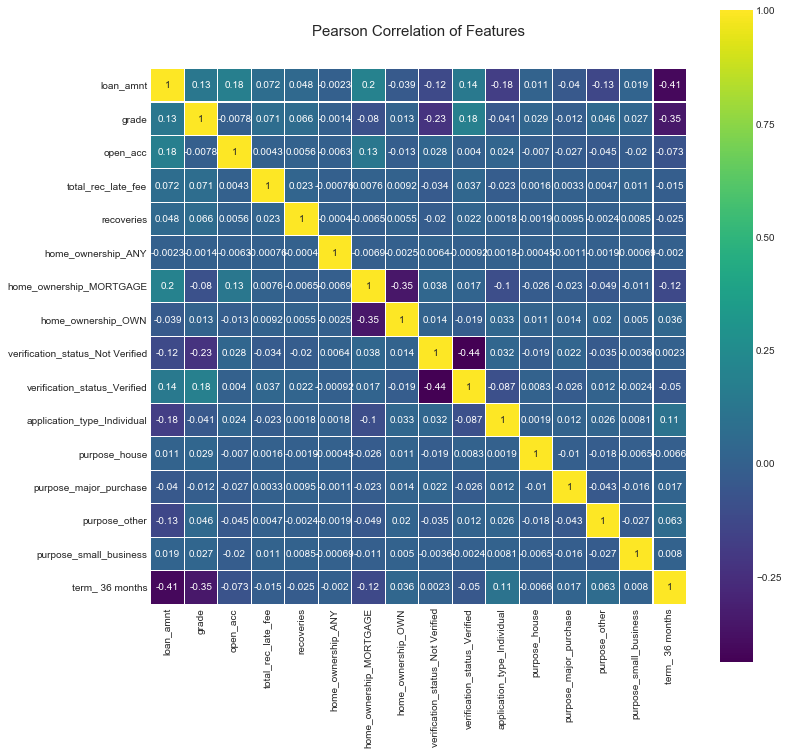

In [63]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(loans_ml_df[col_filter_2].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#### Embedded approach: Feature importances with forests of trees

In [64]:
names = loans_ml_df[col_filter_2].columns
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10,random_state=123) 
clf.fit(x_val[col_filter_2], y_val)

for feature in zip(names, clf.feature_importances_):
    print(feature)

('loan_amnt', 0.41252218146358882)
('grade', 0.059370967167845221)
('open_acc', 0.25838824388966386)
('total_rec_late_fee', 0.077706615996908784)
('recoveries', 0.1132512317422724)
('home_ownership_ANY', 0.0002162361818486025)
('home_ownership_MORTGAGE', 0.0081706527963210807)
('home_ownership_OWN', 0.010898623123451067)
('verification_status_Not Verified', 0.0086444042556776124)
('verification_status_Verified', 0.0075656574328373484)
('application_type_Individual', 0.011149553255362725)
('purpose_house', 0.0017016071117862419)
('purpose_major_purchase', 0.0053539589480551698)
('purpose_other', 0.011039840572263076)
('purpose_small_business', 0.0039821015511499348)
('term_ 36 months', 0.010038124510968107)


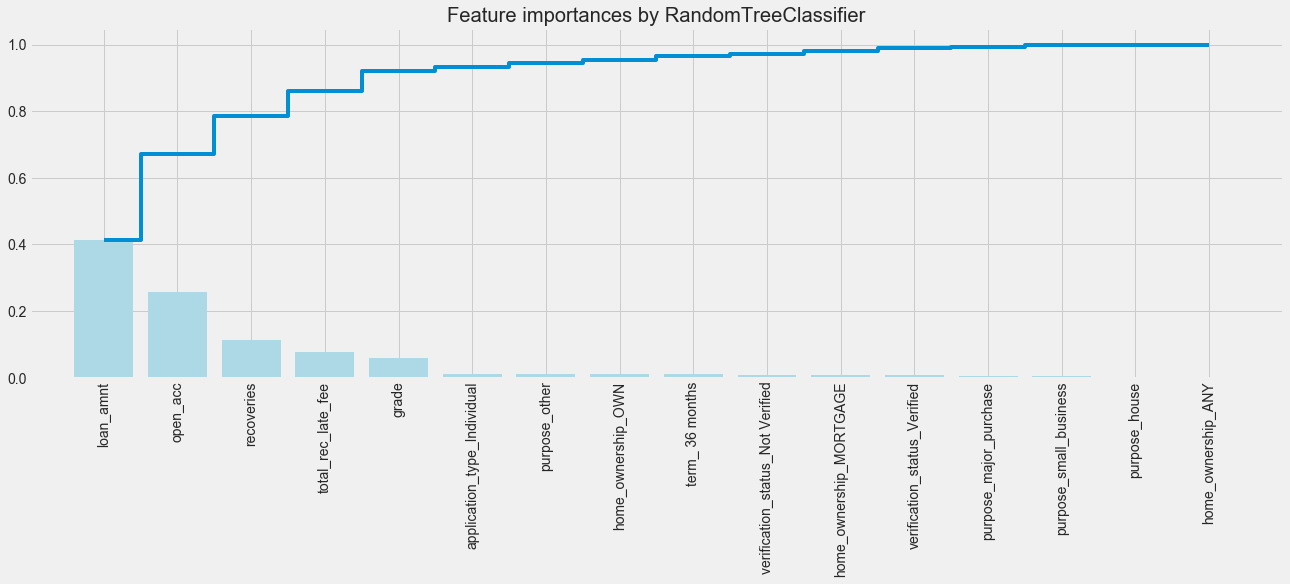

In [65]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# feature importances -- visualization
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

## Model

### Training

#### Deal with unbalanced data: oversampling

In [75]:
X = loans_ml_df[col_filter_2] # using filter approach
y = loans_ml_df['loan_status']

n_sample = y.shape[0]
n_pos_sample = y[y==0].shape[0]
n_neg_sample = y[y==1].shape[0]
print(n_pos_sample, n_neg_sample)

print('total samples: {}; positive: {:.2%}; negative: {:.2%}'.format(n_sample, n_pos_sample / n_sample, n_neg_sample / n_sample))
print('feature dimension: ', X.shape[1])

99198 6253
total samples: 105451; positive: 94.07%; negative: 5.93%
feature dimension:  16


In [76]:
# increse the number of negative samples using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y)

n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]

print(n_pos_sample, n_neg_sample)

print('total samples: {}; positive: {:.2%}; negative: {:.2%}'.format(n_sample, n_pos_sample / n_sample, n_neg_sample / n_sample))

99198 99198
total samples: 198396; positive: 50.00%; negative: 50.00%


### Fit

#### Deal with overfitting -- cross-validation & grid search

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

param_grid = {'C': [100, 1000], 'penalty': [ 'l1', 'l2']}

# param grid search ，cv=5-fold
clf2 = GridSearchCV(LogisticRegression(), param_grid, cv=5) 
clf2.fit(X_train, y_train)

# takes about 30 min to finish

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [101]:
results = pd.DataFrame(clf2.cv_results_ ) 
best = np.argmax(results.mean_test_score.values)

In [102]:
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,141.52230,0.00367,0.67940,0.67959,100,l1,"{'C': 100, 'penalty': 'l1'}",3,0.68118,0.67937,...,0.68317,0.67911,0.67485,0.67978,0.67996,0.67921,6.72397,0.00142,0.00286,0.00049
1,1.45320,0.00418,0.67943,0.67975,100,l2,"{'C': 100, 'penalty': 'l2'}",2,0.68064,0.67926,...,0.68320,0.67944,0.67453,0.68021,0.68065,0.67902,0.14680,0.00189,0.00293,0.00068
2,137.04093,0.00351,0.67929,0.67956,1000,l1,"{'C': 1000, 'penalty': 'l1'}",4,0.68074,0.67914,...,0.68356,0.67948,0.67464,0.67966,0.67978,0.67900,5.96989,0.00143,0.00299,0.00052
3,1.50702,0.00322,0.67944,0.67977,1000,l2,"{'C': 1000, 'penalty': 'l2'}",1,0.68060,0.67927,...,0.68317,0.67942,0.67449,0.68020,0.68068,0.67914,0.25917,0.00020,0.00292,0.00064


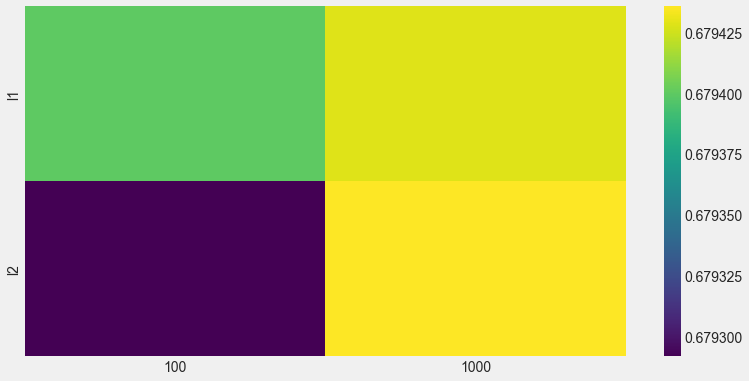

In [103]:
scores = np.array(results.mean_test_score).reshape(2, 2)
sns.heatmap(scores, yticklabels=param_grid['penalty'], xticklabels=param_grid['C'], cmap="viridis")
# no big differences, but still we use the best one

In [104]:
print("Best parameters: {}".format(clf2.best_params_))
print("Best cross-validation score: {:.5f}".format(clf2.best_score_))
print("Best estimator:\n{}".format(clf2.best_estimator_))

Best parameters: {'C': 1000, 'penalty': 'l2'}
Best cross-validation score: 0.67944
Best estimator:
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


#### Evaluation

- TP，True Positive 
- FP，False Positive 
- TN，True Negative 
- FN，False Negative

precision = TP / (TP + FP)

recall = TP / (TP + FN)

accuracy = (TP + TN) / (TP + FP + TN + FN)

F1 Score = 2*P*R/(P+R)，其中P和R分别为 precision 和 recall

In [125]:
# give label 0 /1
y_pred = clf2.predict(X_test)
print("Test set accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred2,)))

Test set accuracy score: 0.68220


In [135]:
# gives proba for each label
y_prob =clf2. predict_proba(X_test)

(0.49926113548874212, 0.50073886451125782)

In [137]:
y_pred[:10], y_prob[:10, 1] # second col of y_prob is for label 1

(array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1]),
 array([ 0.75373536,  0.34311487,  0.19806036,  0.30539108,  0.74576706,
         0.54187772,  1.        ,  0.96285425,  0.15762567,  0.67118481]))

In [149]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.65      0.77      0.71     29647
          1       0.72      0.59      0.65     29872

avg / total       0.69      0.68      0.68     59519



In [108]:
m = confusion_matrix(y_test, y_pred2) 
m 

array([[22916,  6731],
       [12184, 17688]])

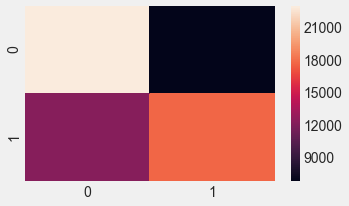

In [109]:
m2 = confusion_matrix(y_test, y_pred2) 
plt.figure(figsize=(5,3))
sns.heatmap(m2) # visualization

In [113]:
fpr, tpr

(array([ 0.        ,  0.22703815,  1.        ]),
 array([ 0.        ,  0.59212641,  1.        ]))

In [122]:
roc_auc2 = roc_auc_score(y_test, y_pred2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.682544


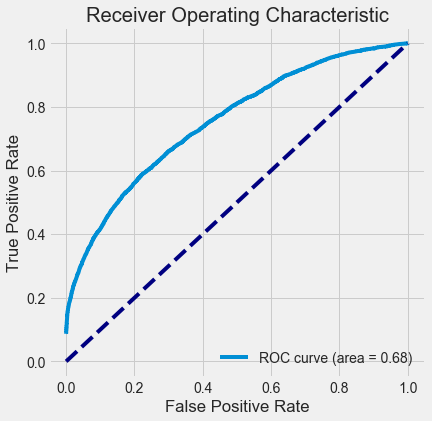

In [148]:
from sklearn.metrics import roc_curve, roc_auc_score
# plot the ROC curve
plt.figure(figsize=(6,6))
fpr, tpr, threshold = roc_curve(y_test, y_prob[:, 1])
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")


## Reference
### Libraries
[missing values](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

[pandas.DataFrame.replace](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace)

[pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

[sklearn.model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

[Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)

[plot ROC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)

### Concepts

[Recursive Feature Elimination]()

[Forests of Tree]()

[Feature importances with forests of trees scikit-learn](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

[SMOTE](http://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/chawla2002.html)

[LogisticRegression](https://blog.csdn.net/Eastmount/article/details/77920470)

[Confusion matrix-wiki](https://en.wikipedia.org/wiki/Confusion_matrix)

